# W9 Lab Assignment

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss

sns.set_style('white')

%matplotlib inline

# High dimensional data

In the IMDb dataset, we have two dimensions (number of votes and rating). How about if we have high dimensional data? First, in many cases, the number of dimensions is not too large. For instance, the ["Iris" dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) contains four dimensions of measurements on the three types of iris flower species. It's more than two dimensions, yet still manageable. 

This dataset is also included in seaborn, so we can load it.

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We get four dimensions (sepal_length, sepal_width, petal_length, petal_width). One direct way to visualize them is to have a scatter plot for each pair of dimensions. We can use the [**`pairplot()`**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html) function in seaborn to do this.

Try the following code. What do you see?

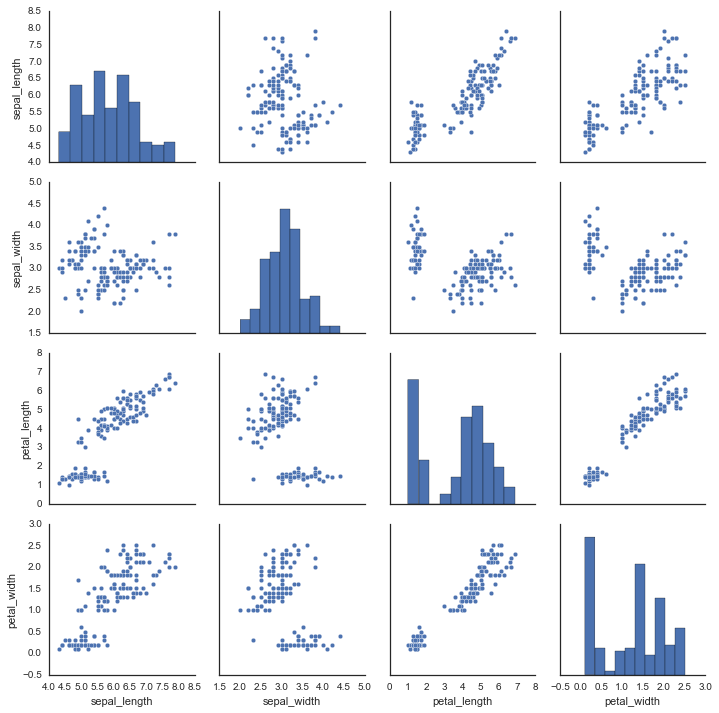

In [4]:
sns.pairplot(iris)

We can also color the symbols based on species:

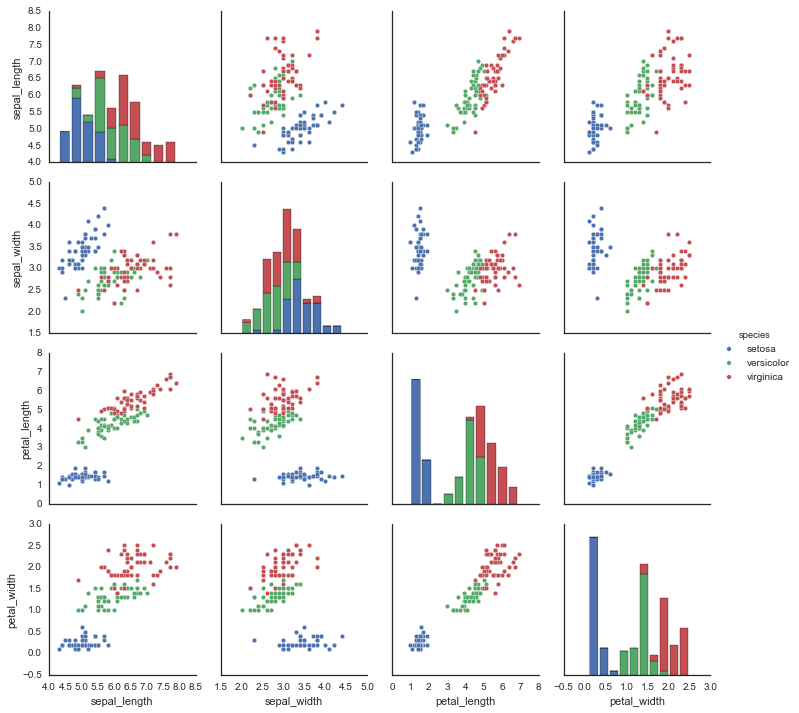

In [5]:
sns.pairplot(iris, hue='species')

The colors represent the three different iris species, so based on the colors, we can tell that when we draw a scatter plot of a pair of dimensions, whether the plot seperates out the species clearly or not. What do you think are the pair of dimensions that best seperate the species?

**TODO: provide your explanation.**
The above plot illustrates that petal_length and petal_width help speparate the species best.
The three species are distinguished in the scatterplot above and hence help in seperating the three species.

## PCA 

The [principal component analysis (PCA)](http://setosa.io/ev/principal-component-analysis/) is a nice dimensionality reduction method. The goal of dimensionality reduction is, of course, to reduce the number of variables (dimensions, measurements, columns). 

For example, in the Iris dataset we have four variables (`sepal_length`, `sepal_width`, `petal_length`, `petal_width`). If we can reduce the number of variables to two, then we can easily visualize them. PCA offers one way to do this.

PCA is already implemented in the [scikit-learn](http://scikit-learn.org/stable/) package, a machine learning library in Python, which should have been included in Anaconda. If not, to install scikit-learn, run:

`conda install scikit-learn`

or

`pip install scikit-learn`

Before running PCA, we need to transform the `iris` from [`DataFrame`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) to [Numpy's array](http://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) object. [DataFrame.values](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.values.html) returns the Numpy representation of `DataFrame`.

Extract the four variable as X and species as Y:

In [6]:
X = iris.values[:, 0:4] # extract the 1st to the 3rd columns of all rows
Y = iris.values[:, 4] # extract the 4th column of all rows
print(X)
print(Y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

We can now perform PCA with the following code:

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # set the number of components to 2
X_r = pca.fit(X).transform(X)

#Make a dataframe with the results
df = pd.DataFrame(X_r, columns=['PC1', 'PC2'])
df['species'] = Y

Now we only have two dimensions. We can plot them again with the previous code:

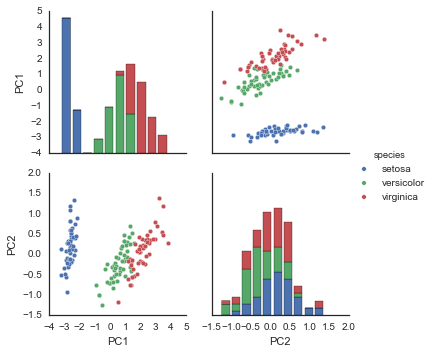

In [8]:
sns.pairplot(df, hue='species')

Compare with the previous plot. What do you think PCA was doing? How did it reduce dimensionality to 2?

**TODO: provide your thoughts**
PCA is used for dimensionality reduction and captures the variance among the various dimensions.
Similar range in the PC1 which is 8 is almost similar to the petal_length range. 
There is no linear correlation between PCA1 and PCA2.

## t-SNE
[t-SNE (t-Distributed Stochastic Neighbor Embedding)](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)  is also tool to visualize high-dimensional data. The technique has become widespread in the field of machine learning, since it has an almost magical ability to create compelling two-dimensonal “maps” from data with hundreds or even thousands of dimensions. 

Let's try it out with the iris data.

In [9]:
from sklearn.manifold import TSNE

In [10]:
from sklearn.datasets import load_iris

iris = load_iris()
X_tsne = TSNE(learning_rate=100, perplexity=30).fit_transform(iris.data)

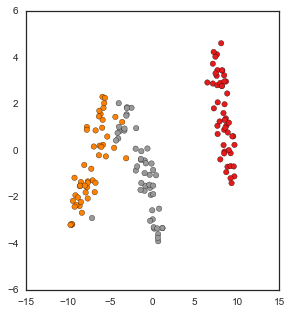

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target, cmap='Set1', s=30)

The hyperparameter `perplexity` determines how to balance attention between local and global aspects of your data. Changing this parameter (default is 30) can cause drastic changes in the output:

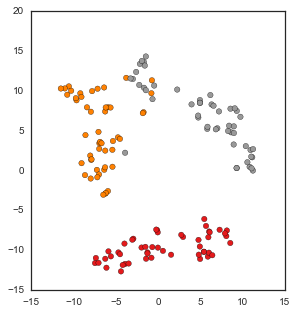

In [12]:
X_tsne = TSNE(learning_rate=100, perplexity=10).fit_transform(iris.data)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target, cmap='Set1', s=30)

Experiment with a few different perplexity values. How do you think it influences the result?

**TODO: put your experiments and answers here.**
Points are clustered close to each other in some cases.

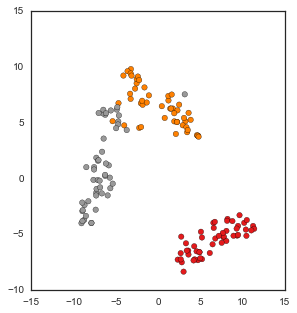

In [13]:
X_tsne = TSNE(learning_rate=100, perplexity=20).fit_transform(iris.data)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target, cmap='Set1', s=30)

t-SNE is a tool for data visualization. It reduces the dimensionality of data to 2 or 3 dimensions so that it can be 
plotted easily. 
The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms.
Controls how tight natural clusters in the original space are in the embedded space and how much is the space between 
them.

From the above plots we can clearly see as the difference in perplexity shows the clusters being a bit spread out in 
some cases and not in the other.
